In [1]:
from pynq import Overlay

# Load bitstream and hardware description
overlay = Overlay("/home/xilinx/jupyter_notebooks/design_1.bit")
overlay.download()

overlay.ip_dict.keys()

dict_keys(['hier_0/axi_dma_0', 'processing_system7_0'])

In [2]:
# Load DMA
dma = overlay.hier_0.axi_dma_0  # Replace with actual DMA name

In [3]:
print(dma)

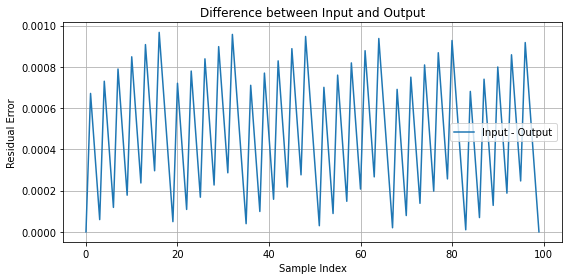

In [18]:
import matplotlib.pyplot as plt
from pynq import Overlay, allocate
import numpy as np

# Generate test input - example: a triangle wave
x_test = np.linspace(-1, 1, 100).astype(np.float32)

# Allocate buffers
in_buffer = allocate(shape=x_test.shape, dtype=np.float32)
out_buffer = allocate(shape=x_test.shape, dtype=np.float32)

# Copy input data
np.copyto(in_buffer, x_test)

# DMA Transfer
dma.sendchannel.transfer(in_buffer)
dma.sendchannel.wait()
dma.recvchannel.transfer(out_buffer)
dma.recvchannel.wait()

plt.figure(figsize=(8, 4))
plt.plot(in_buffer - out_buffer, label='Input - Output')
plt.title("Difference between Input and Output")
plt.xlabel("Sample Index")
plt.ylabel("Residual Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

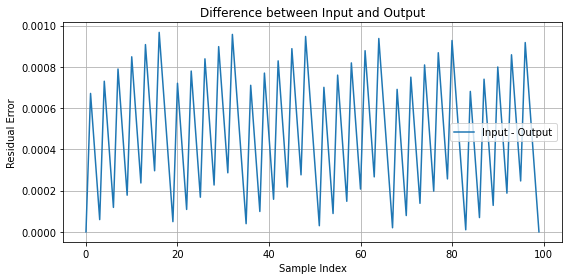

In [18]:
import matplotlib.pyplot as plt
from pynq import Overlay, allocate
import numpy as np

# Generate test input - example: a triangle wave
x_test = np.linspace(-1, 1, 100).astype(np.float32)

# Allocate buffers
in_buffer = allocate(shape=x_test.shape, dtype=np.float32)
out_buffer = allocate(shape=x_test.shape, dtype=np.float32)

# Copy input data
np.copyto(in_buffer, x_test)

# DMA Transfer
dma.sendchannel.transfer(in_buffer)
dma.sendchannel.wait()
dma.recvchannel.transfer(out_buffer)
dma.recvchannel.wait()

plt.figure(figsize=(8, 4))
plt.plot(in_buffer - out_buffer, label='Input - Output')
plt.title("Difference between Input and Output")
plt.xlabel("Sample Index")
plt.ylabel("Residual Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()